In [30]:
import pandas as pd
from scipy import integrate
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7,5)

In [ ]:
def calc_AmpereSecFromDataFrame(df):
    return integrate.trapz(df.current_mA.div(1000), df.time_ms.div(1000))


def calc_load_coulomb_str(df):
    load = calc_AmpereSecFromDataFrame(df)
    return "Q = {:.4f} As".format(load)

# DHCP

In [32]:
data_frame_dhcp = pd.read_csv("dynamic_ip.csv", sep=" ", names=["time_ms", "current_mA"])
data_frame_dhcp.describe()



,time_ms,current_mA
count,14820.000000,14820.000000
mean,287250.002632,56.004696
std,11796.308497,28.887264
min,266817.000000,-10.418180
25%,277031.250000,68.231820
50%,287253.500000,68.677270
75%,297464.750000,69.336360
max,307689.000000,145.454540


<ipython-input-26-d0e0ab91b3a1>:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(df_dhcp.time_ms[:, None], df_dhcp.current_mA[:, None], label="Current [mA]")


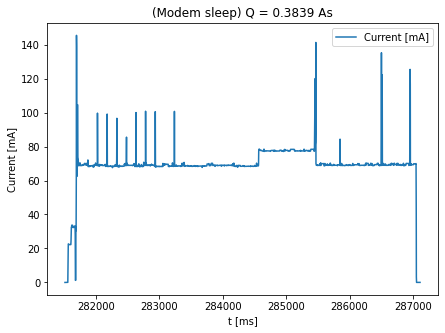

In [26]:
df_dhcp = data_frame_dhcp[5334:7358]
plt.title("(Modem sleep) " + calc_load_coulomb_str(df_dhcp))
plt.xlabel("t [ms]")
plt.ylabel("Current [mA]")
plt.plot(df_dhcp.time_ms[:, None], df_dhcp.current_mA[:, None], label="Current [mA]")
plt.legend()
plt.show()

# Static 

In [33]:
data_frame_static = pd.read_csv("static_ip.csv", sep=" ", names=["time_ms", "current_mA"])
data_frame_static.describe()

,time_ms,current_mA
count,13560.000000,13559.000000
mean,51863.394395,46.916368
std,11322.117722,32.815881
min,70.000000,-11.022730
25%,43119.250000,0.045450
50%,52269.500000,68.400000
75%,61401.500000,69.177270
max,70566.000000,145.454540


<ipython-input-40-6b96ea91f22d>:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(df_static.time_ms[:, None], df_static.current_mA[:, None], label="Current [mA]")


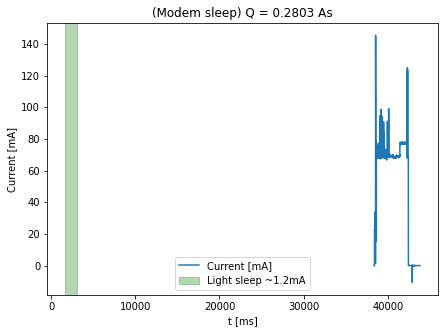

In [40]:
df_static = data_frame_static[1630:3654]
plt.title("(Modem sleep) " + calc_load_coulomb_str(df_static))
plt.xlabel("t [ms]")
plt.ylabel("Current [mA]")
plt.plot(df_static.time_ms[:, None], df_static.current_mA[:, None], label="Current [mA]")
plt.axvspan(38409, 42435, color='green', alpha=0.3, label="Light sleep ~1.2mA")
plt.legend()
plt.show()
# plt.title("(Wakeup for DTIM [Beacon interval = 100ms]) " + calc_load_coulomb_str(df_dtim))
# plt.xlabel("t [ms]")
# plt.ylabel("Current [mA]")
# plt.plot(df_dtim.time_ms[:, None], df_dtim.current_mA[:, None], label="Current [mA]")
# plt.axvspan(12804, 12905, color='red', alpha=0.3, label="DTIM (Beacon interval: 100ms)")
# plt.legend(loc="upper left")
# plt.show()

/Users/DEV/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


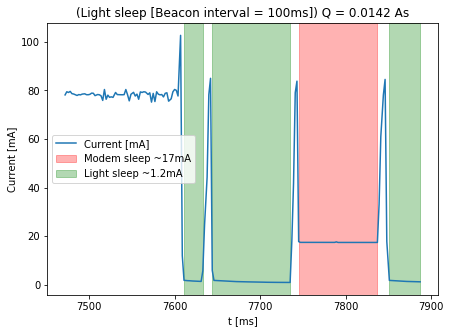

In [ ]:
df_light_sleep_short = df_light_sleep[3600:3800]
plt.title("(Light sleep [Beacon interval = 100ms]) " + calc_load_coulomb_str(df_light_sleep_short))
plt.xlabel("t [ms]")
plt.ylabel("Current [mA]")
plt.plot(df_light_sleep_short.time_ms[:, None], df_light_sleep_short.current_mA[:, None], label="Current [mA]")
plt.axvspan(7745, 7837, color='red', alpha=0.3, label="Modem sleep ~17mA")
plt.axvspan(7611, 7633, color='green', alpha=0.3, label="Light sleep ~1.2mA")
plt.axvspan(7644, 7735, color='green', alpha=0.3)
plt.axvspan(7851, 7887, color='green', alpha=0.3)
plt.legend()
plt.show()

# Deep sleep

In [ ]:
df_deep_sleep = pd.read_csv("deep_sleep.csv", sep=" ", names=["time_ms", "current_mA"])
df_deep_sleep.describe()

,time_ms,current_mA
count,16687.000000,16687.000000
mean,17620.706658,49.212474
std,10278.288107,38.886063
min,12.000000,0.000000
25%,8702.500000,0.040910
50%,17577.000000,78.550000
75%,26491.000000,79.122730
max,35490.000000,145.454540


/Users/DEV/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


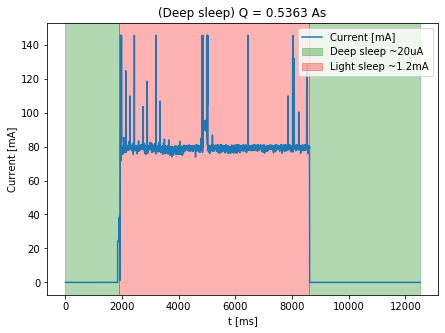

In [ ]:
df_deep_sleep_short = df_deep_sleep[0:6000]
plt.title("(Deep sleep) " + calc_load_coulomb_str(df_deep_sleep_short))
plt.xlabel("t [ms]")
plt.ylabel("Current [mA]")
plt.plot(df_deep_sleep_short.time_ms[:, None], df_deep_sleep_short.current_mA[:, None], label="Current [mA]")
plt.axvspan(0, 1900, color='green', alpha=0.3, label="Deep sleep ~20uA")
plt.axvspan(1900, 8600, color='red', alpha=0.3, label="Light sleep ~1.2mA")
plt.axvspan(8600, 12500, color='green', alpha=0.3)
plt.legend()
plt.show()